

```
# In this assignment, you will train a model using Logistic Regression. Go to
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 and download
the download the Wisconsin Breast Cancer dataset. The dataset contains 699 instances of breast tumors
with the following attributes:

```



In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = [
    "Sample code number", "Clump Thickness", "Uniformity of Cell Size",
    "Uniformity of Cell Shape", "Marginal Adhesion",
    "Single Epithelial Cell Size", "Bare Nuclei",
    "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"
]



**From the raw data set, remove rows with missing values, remove the column “Sample code number”
and replace the “Class” values into 0’s and 1’s (0 for benign, 1 for malignant). You may choose to do
this in Python (Pandas) or manually in spreadsheet application. The goal is to make a classifier for the
tumor status**

In [33]:
data = pd.read_csv(url, header=None, names=column_names)
# Data preprocessing
data = data.replace('?', pd.NA)  # Replace '?' with NaN
data = data.dropna()  # Remove rows with missing values
data = data.drop(columns=["Sample code number"])  # Drop the ID column
data["Class"] = data["Class"].replace({2: 0, 4: 1})  # Replace Class values

**1. Split the samples into 70% Training and 30% Testing at random.**

**2. Use stratify=y in the test_train_split function. Build a pipeline using the Standard scaler and logistic regression.**

**3. Use the default penalty settings of Logistic Regression.**

In [36]:
# Split features and target
X = data.drop(columns=["Class"])
y = data["Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Split the samples into 70% Training and 30% Testing at random.
#Use stratify=y in the test_train_split function. Build a pipeline using the Standard scaler and logistic regression.

# Train logistic regression model
model = LogisticRegression()#3. Use the default penalty settings of Logistic Regression.
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9560975609756097
Confusion Matrix:
[[125   2]
 [  7  71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       127
           1       0.97      0.91      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



In [38]:
pipeline.named_steps

{'scaler': StandardScaler(), 'logreg': LogisticRegression(random_state=42)}

**4. After fitting the data, what is the models training and testing accuracy?** 0.9560975609756097
**Which features are most important?** Bare Nuclei, Clump Thickness, and Bland Chromatin are the ones that got a coefficient above 1

In [40]:
# Check pipeline structure
print(pipeline.named_steps)

# Use the correct name for the logistic regression step
coefficients = pipeline.named_steps['logreg'].coef_[0]  # Adjust to the correct step name
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Print results
print("\nFeature Importance:")
print(feature_importance)


{'scaler': StandardScaler(), 'logreg': LogisticRegression(random_state=42)}

Feature Importance:
                       Feature  Coefficient
5                  Bare Nuclei     1.513283
0              Clump Thickness     1.185655
6              Bland Chromatin     1.033691
8                      Mitoses     0.745703
2     Uniformity of Cell Shape     0.708695
3            Marginal Adhesion     0.601232
7              Normal Nucleoli     0.522136
1      Uniformity of Cell Size     0.184572
4  Single Epithelial Cell Size     0.021981


**5 Generate a confusion matrix, then calculate the other metrics: F1-score, Precision, Recall, and False alarm rate**

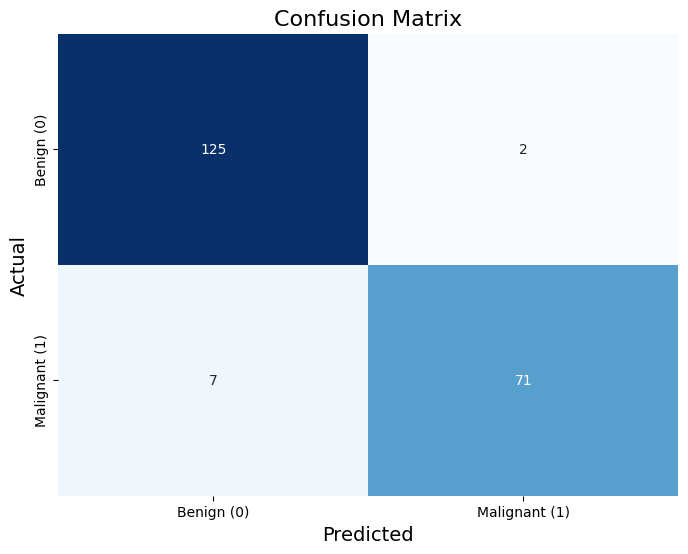


Metrics:
Precision: 0.97
Recall: 0.91
F1-Score: 0.94
False Alarm Rate (FAR): 0.02


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    """
    Calculate precision, recall, F1-score, and false alarm rate.
    """
    conf_matrix = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # False Alarm Rate (FAR): FP / (FP + TN)
    false_alarm_rate = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])

    return conf_matrix, precision, recall, f1, false_alarm_rate

def plot_confusion_matrix(conf_matrix):
    """
    Plot a visually appealing confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Benign (0)", "Malignant (1)"],
                yticklabels=["Benign (0)", "Malignant (1)"])
    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.show()

def display_metrics(conf_matrix, precision, recall, f1, false_alarm_rate):
    """
    Display the confusion matrix plot and metrics in a structured format.
    """
    plot_confusion_matrix(conf_matrix)
    print("\nMetrics:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"False Alarm Rate (FAR): {false_alarm_rate:.2f}")

# Generate confusion matrix and metrics
conf_matrix, precision, recall, f1, false_alarm_rate = calculate_metrics(y_test, y_pred)

# Display results
display_metrics(conf_matrix, precision, recall, f1, false_alarm_rate)


**6 Plot the ROC curve and report the AUC. For this item, make a result for both the training and testing data, separately.**

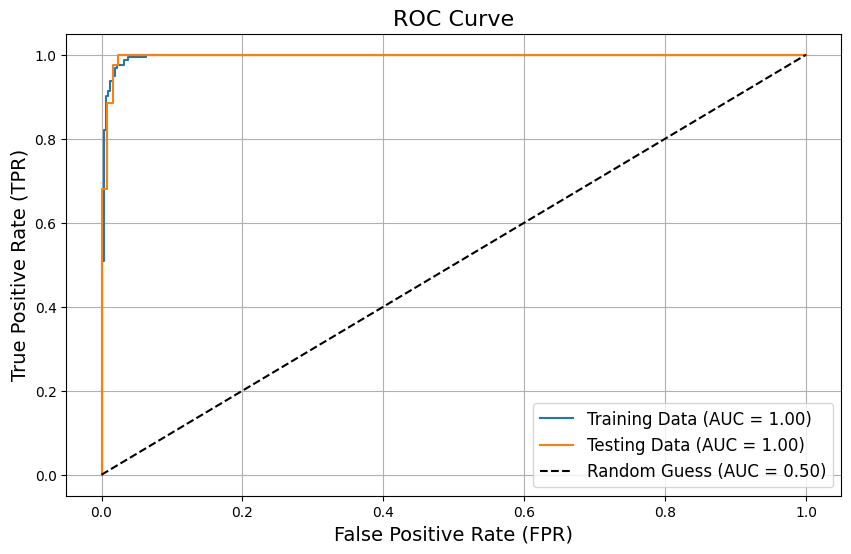

Training Data AUC: 1.00
Testing Data AUC: 1.00


In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true_train, y_pred_train_prob, y_true_test, y_pred_test_prob):
    """
    Plot ROC curves for both training and testing data, and calculate AUC.
    """
    # ROC for training data
    fpr_train, tpr_train, _ = roc_curve(y_true_train, y_pred_train_prob)
    auc_train = auc(fpr_train, tpr_train)

    # ROC for testing data
    fpr_test, tpr_test, _ = roc_curve(y_true_test, y_pred_test_prob)
    auc_test = auc(fpr_test, tpr_test)

    # Plot ROC curves
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_train, tpr_train, label=f"Training Data (AUC = {auc_train:.2f})")
    plt.plot(fpr_test, tpr_test, label=f"Testing Data (AUC = {auc_test:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")  # Diagonal line
    plt.title("ROC Curve", fontsize=16)
    plt.xlabel("False Positive Rate (FPR)", fontsize=14)
    plt.ylabel("True Positive Rate (TPR)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()

    return auc_train, auc_test

# Get predicted probabilities for the positive class (malignant: 1)
y_train_pred_prob = pipeline.predict_proba(X_train)[:, 1]
y_test_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Plot ROC curve and calculate AUC
auc_train, auc_test = plot_roc_curve(y_train, y_train_pred_prob, y_test, y_test_pred_prob)

# Display AUC values
print(f"Training Data AUC: {auc_train:.2f}")
print(f"Testing Data AUC: {auc_test:.2f}")


1. What steps are required to remove the "Sample code number" column?


```
# # Check initial dataset
print("Before removing 'Sample code number':")
print(data.head())

# Remove the column
data = data.drop(columns=["Sample code number"])

# Verify removal
print("\nAfter removing 'Sample code number':")
print(data.head())

```


2. How can the "Class" values be converted into binary (0 and 1) form in Python?


```
# Check unique values before conversion
print("Before conversion:")
print(data["Class"].unique())

# Replace values
data["Class"] = data["Class"].replace({2: 0, 4: 1})

# Check unique values after conversion
print("\nAfter conversion:")
print(data["Class"].unique())

```


3. What is the importance of splitting the dataset into training and testing sets?



 >Splitting a dataset into training and testing sets is essential for evaluating the performance and reliability of a machine learning model. The primary purpose of this split is to assess how well the model generalizes to unseen data. The training set is used to build the model by learning patterns, relationships, and parameters, while the testing set simulates new, unseen data to validate the model's predictive performance.

>Without this split, the model might be evaluated on the same data it was trained on, leading to overly optimistic results. This can result in overfitting, where the model memorizes the training data rather than learning generalizable patterns. By using a separate testing set, we can detect overfitting and understand how the model performs on data it has never encountered.

>Furthermore, splitting the dataset ensures that the metrics like accuracy, precision, recall, and F1-score are reliable and reflective of real-world performance. It also helps avoid data leakage, where information from the testing set inadvertently influences the training process, leading to biased evaluations.




4. Why is it necessary to use the stratify parameter in the train_test_split function?



> The purpose of stratification is to ensure that the proportion of each class is maintained in both the training and testing sets, reflecting the original dataset's distribution.

>Without stratification, the random splitting process might inadvertently create training or testing sets that are heavily skewed toward one class. This imbalance can lead to unreliable model evaluation, as the model might perform well on the dominant class while underperforming on the minority class, giving misleading results for metrics like accuracy.



5. What is logistic regression, and why is it suitable for this dataset?

>Logistic regression is a statistical model used for binary classification problems. It predicts the probability of an outcome belonging to one of two classes by applying a logistic (sigmoid) function to a linear combination of input features.

>It is suitable for this dataset because the goal is to classify tumors as benign (0) or malignant (1), which is a binary classification task. Logistic regression handles this efficiently, especially for relatively small and clean datasets like this, providing interpretable results and probabilistic outputs.

6. How can the training and testing accuracy of the logistic regression model be calculated?



```
# Training Accuracy
training_accuracy = model.score(X_train, y_train)
# Testing Accuracy
testing_accuracy = model.score(X_test, y_test)

```

7. Which features in the dataset are most influential in determining the tumor status, and how can
their importance be assessed?

>The most influential features in determining tumor status can be identified by examining the coefficients of the logistic regression model. Each coefficient represents the impact of a feature on the likelihood of the tumor being classified as malignant (positive class).

>Bare Nuclei, Clump Thickness, and Bland Chromatin are the ones that got a coefficient above 1

8. How is a confusion matrix generated, and what does it represent?

>A confusion matrix is generated using `confusion_matrix(y_true, y_pred)` in scikit-learn. It represents the counts of True Positives, True Negatives, False Positives, and False Negatives, summarizing the model's classification performance.

9. How are precision, recall, F1-score, and false alarm rate calculated from the confusion matrix?

- **Precision**: TP / (TP + FP)  
  The proportion of correct positive predictions out of all positive predictions.

- **Recall**: TP / (TP + FN)  
  The proportion of actual positives correctly predicted by the model.

- **F1-Score**: 2 * (Precision * Recall) / (Precision + Recall)  
  The harmonic mean of precision and recall.

- **False Alarm Rate**: FP / (FP + TN)  
  The proportion of false positives among all actual negatives.

10. Why are these metrics important for evaluating the performance of a classifier?

- **Precision**: Important when false positives have a high cost, as it measures how many positive predictions are correct.

- **Recall**: Critical when false negatives are costly, as it shows how many actual positives the model identifies.

- **F1-Score**: Provides a balance between precision and recall, especially useful when the dataset is imbalanced.

- **False Alarm Rate**: Indicates how often the model incorrectly labels negatives as positives, important for assessing reliability in specific contexts.

These metrics provide a comprehensive view of the model's strengths and weaknesses beyond accuracy, making them essential for evaluating classifier performance in real-world scenarios.

11. What is an ROC curve, and how is it plotted for a logistic regression model?

An ROC (Receiver Operating Characteristic) curve shows the trade-off between the true positive rate (TPR) and false positive rate (FPR) at various thresholds. It helps visualize a model's performance across all classification thresholds.

**Steps to Plot:**
1. Use `predict_proba` to get predicted probabilities for the positive class.
2. Compute TPR and FPR using `roc_curve(y_true, y_pred_prob)` from scikit-learn.
3. Plot FPR on the x-axis and TPR on the y-axis.

**AUC (Area Under Curve)** quantifies the model's overall ability to distinguish between classes; a higher AUC indicates better performance.

12. How is the AUC (Area Under the Curve) calculated, and what does it signify about the model's
performance?

**Calculation:**
AUC is computed using the ROC curve by integrating the area under the curve formed by plotting the true positive rate (TPR) against the false positive rate (FPR). In scikit-learn, it is calculated using `auc(fpr, tpr)`.

**Significance:**
- AUC measures the model's ability to distinguish between positive and negative classes.
- **AUC = 1.0**: Perfect classifier.
- **AUC = 0.5**: Random guessing.
- Higher AUC values indicate better model performance, with the model making more correct predictions across various thresholds.

13. How do the training and testing ROC curves compare, and what insights can be derived from this
comparison?

**Comparison:**
- The training ROC curve typically shows better performance because the model is optimized on this data.
- The testing ROC curve reflects how well the model generalizes to unseen data.

**Insights:**
- If the training and testing curves are similar, the model generalizes well, indicating no overfitting.
- A significant gap (training curve much better than testing) suggests overfitting, where the model performs well on training data but poorly on new data.
- Both curves close to the diagonal line indicate underfitting, where the model struggles to learn patterns from the data.

Examining these curves helps evaluate whether the model is balanced in its ability to learn and generalize.

14. What challenges did you encounter during the preprocessing or model training phases, and how
did you address them?

>Had trouble stratifying the model after mapping them into binary. I addressed this by not overcomplicating the pre-processing which was breaking the model.

15. If the model's performance is not satisfactory, what adjustments could be made to improve it?


**I had to put this here because im having trouble with the numbers. Its breaking the text formatting**
```
#
1. **Feature Engineering**:
   - Add or remove features based on domain knowledge.
   - Create new features by combining existing ones.

2. **Data Preprocessing**:
   - Handle missing values or outliers.
   - Normalize or standardize features for better convergence.

3. **Hyperparameter Tuning**:
   - Optimize logistic regression parameters like `C` (regularization strength).

4. **Address Class Imbalance**:
   - Use techniques like oversampling (e.g., SMOTE) or undersampling to balance the dataset.
   - Apply class weights in the model (`class_weight='balanced'`).

5. **Change Model Complexity**:
   - Use a more complex model (e.g., decision trees, random forests) if logistic regression is too simplistic.

6. **Increase Training Data**:
   - Collect more data to improve model generalization.

7. **Cross-Validation**:
   - Use cross-validation to assess and improve model stability across datasets.

8. **Try Different Algorithms**:
   - Experiment with other classifiers like SVMs or neural networks for better results.

Adjustments depend on specific shortcomings identified in the current model's performance.
```


